<a href="https://colab.research.google.com/github/2714830587-xh/CLRS-GG/blob/master/chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 549 kB/s 
     |████████████████████████████████| 61 kB 6.7 MB/s 
     |████████████████████████████████| 11.2 MB 65.7 MB/s 
     |████████████████████████████████| 9.9 MB 45.3 MB/s 
     |████████████████████████████████| 15.7 MB 56.4 MB/s 
     |████████████████████████████████| 930 kB 44.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

In [2]:
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
y
  Successfully uninstalled matplotlib-3.5.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 6.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are

In [ ]:
import collections
import re
from d2l import torch as d2l

In [ ]:
d2l.DATA_HUB['time_machine'] = (d2l.DATA_URL + 'timemachine.txt',
                                '090b5e7e70c295757f55df93cb0a180b9691891a')
def read_time_machine():
  with open(d2l.download("time_machine"),"r") as f:
    lines=f.readlines()
  return [re.sub("[^A-Za-z]+"," ",line).strip().lower() for line in lines]
lines=read_time_machine()
print(f"#文本总行数:{len(lines)}")
print(lines[0])
print(lines[2])  
print(lines[10])  

#文本总行数:3221
the time machine by h g wells

twinkled and his usually pale face was flushed and animated the


In [ ]:
def tokenize(lines,token="word"):
  if token=="word":
    return [line.split() for line in lines]#把一个字符串分割成字符串数组:
  elif token=="char":
    return [list(line) for line in lines]
  else:
    print("错误:未知词元类型"+token)
tokens=tokenize(lines,token="word")
for i in range(11):
  print(tokens[i])

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
[]
[]
[]
['i']
[]
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him']
['was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and']
['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the']


In [ ]:
class Vocab:  
    """文本词表"""
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        # 按出现频率排序
        counter = count_corpus(tokens)
        # sorted(d.items(), key=lambda x: x[1]) 中 d.items() 为待排序的对象；
        # key=lambda x: x[1] 为对前面的对象中的第二维数据（即value）的值进行排序。 key=lambda  变量：变量[维数] 。
        # reverse参数实现倒序排列
        self._token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                   reverse=True)
        print(self._token_freqs)
        # 未知词元的索引为0
        self.idx_to_token = ['<unk>'] + reserved_tokens
        print(self.idx_to_token)
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}
        print(self.token_to_idx)
        for token, freq in self._token_freqs:
            if freq < min_freq:
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1
                # print(self.idx_to_token)
                # print(self.token_to_idx)
                # break;

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

    @property
    def unk(self):  # 未知词元的索引为0
        return 0

    @property
    def token_freqs(self):
        return self._token_freqs

def count_corpus(tokens): 
    """统计词元的频率"""
    # 这里的tokens是1D列表或2D列表
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # 将词元列表展平成一个列表
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

In [ ]:
vocab = Vocab(tokens)
print(list(vocab.token_to_idx.items())[:10])

[('the', 2261), ('i', 1267), ('and', 1245), ('of', 1155), ('a', 816), ('to', 695), ('was', 552), ('in', 541), ('that', 443), ('my', 440), ('it', 437), ('had', 354), ('me', 281), ('as', 270), ('at', 243), ('for', 221), ('with', 216), ('but', 204), ('time', 200), ('were', 158), ('this', 152), ('you', 137), ('on', 137), ('then', 134), ('his', 129), ('there', 127), ('he', 123), ('have', 122), ('they', 122), ('from', 122), ('one', 120), ('all', 118), ('not', 114), ('into', 114), ('upon', 113), ('little', 113), ('so', 112), ('is', 106), ('came', 105), ('by', 103), ('some', 94), ('be', 93), ('no', 92), ('could', 92), ('their', 91), ('said', 89), ('saw', 88), ('down', 87), ('them', 86), ('machine', 85), ('which', 85), ('very', 85), ('or', 84), ('an', 84), ('we', 82), ('now', 79), ('what', 77), ('been', 75), ('these', 74), ('like', 74), ('her', 74), ('out', 73), ('seemed', 72), ('up', 71), ('man', 70), ('about', 70), ('s', 70), ('its', 69), ('thing', 66), ('again', 62), ('traveller', 61), ('wou

In [ ]:
for i in [0, 10]:
    print('文本:', tokens[i])
    print('索引:', vocab[tokens[i]])

文本: ['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
索引: [1, 19, 50, 40, 2183, 2184, 400]
文本: ['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the']
索引: [2186, 3, 25, 1044, 362, 113, 7, 1421, 3, 1045, 1]


In [ ]:
def load_corpus_time_machine(max_tokens=-1):  
    lines = read_time_machine()
    tokens = tokenize(lines, 'char')
    vocab = Vocab(tokens)
    print("vocab",vocab)
    # 因为时光机器数据集中的每个文本行不一定是一个句子或一个段落，
    # 所以将所有文本行展平到一个列表中
    corpus = [vocab[token] for line in tokens for token in line]
    print(corpus)
    if max_tokens > 0:
        corpus = corpus[:max_tokens]
    return corpus, vocab

corpus, vocab = load_corpus_time_machine()
len(corpus), len(vocab)

[(' ', 29927), ('e', 17838), ('t', 13515), ('a', 11704), ('i', 10138), ('n', 9917), ('o', 9758), ('s', 8486), ('h', 8257), ('r', 7674), ('d', 6337), ('l', 6146), ('m', 4043), ('u', 3805), ('c', 3424), ('f', 3354), ('w', 3225), ('g', 3075), ('y', 2679), ('p', 2427), ('b', 1897), ('v', 1295), ('k', 1087), ('x', 236), ('z', 144), ('j', 97), ('q', 95)]
['<unk>']
{'<unk>': 0}
vocab <__main__.Vocab object at 0x7f3f5dfe8c10>
[3, 9, 2, 1, 3, 5, 13, 2, 1, 13, 4, 15, 9, 5, 6, 2, 1, 21, 19, 1, 9, 1, 18, 1, 17, 2, 12, 12, 8, 5, 3, 9, 2, 1, 3, 5, 13, 2, 1, 3, 10, 4, 22, 2, 12, 12, 2, 10, 1, 16, 7, 10, 1, 8, 7, 1, 5, 3, 1, 17, 5, 12, 12, 1, 21, 2, 1, 15, 7, 6, 22, 2, 6, 5, 2, 6, 3, 1, 3, 7, 1, 8, 20, 2, 4, 23, 1, 7, 16, 1, 9, 5, 13, 17, 4, 8, 1, 2, 24, 20, 7, 14, 6, 11, 5, 6, 18, 1, 4, 1, 10, 2, 15, 7, 6, 11, 5, 3, 2, 1, 13, 4, 3, 3, 2, 10, 1, 3, 7, 1, 14, 8, 1, 9, 5, 8, 1, 18, 10, 2, 19, 1, 2, 19, 2, 8, 1, 8, 9, 7, 6, 2, 1, 4, 6, 11, 3, 17, 5, 6, 23, 12, 2, 11, 1, 4, 6, 11, 1, 9, 5, 8, 1, 14, 8, 14

(170580, 28)

# **语言模型和数据集**

In [ ]:
import random
import torch
from d2l import torch as d2l
tokens=d2l.tokenize(d2l.read_time_machine())
print(tokens[0])
# # 因为每个文本行不一定是一个句子或一个段落，因此我们把所有文本行拼接到一起
corpus=[token for line in tokens for token in line]
print("与上面的不同,corpus=",corpus)
vocab=d2l.Vocab(corpus)
vocab.token_freqs[:10]

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
corpus= ['the', 'time', 'machine', 'by', 'h', 'g', 'wells', 'i', 'the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and', 'twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the', 'fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the', 'lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our', 'glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and', 'caressed', 'us', 'rather', 'than', 'submitted', 'to', 'be', 'sat', 'upon', 'and', 'there', 'was', 'that', 'luxurious', 'after', 'dinner', 'atmosphere', 'when', 'thought', 'roams', 'gracefully', 'free', 'of', 'the', 'trammels', 'of', 'precision', 'and', 'he', 'put', 'it', 'to', 'us', 'in',

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

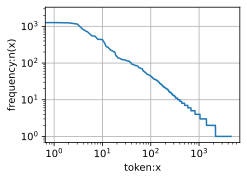

In [ ]:
freqs=[freq for token,freq in vocab.token_freqs]
# freqs 是一个list
d2l.plot(freqs,xlabel="token:x",ylabel="frequency:n(x)",xscale="log",yscale="log")

In [ ]:
bigram_tokens=[pair for pair in zip(corpus[:-1],corpus[1:])]
bigram_vocab=d2l.Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]

[(('of', 'the'), 309),
 (('in', 'the'), 169),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 102),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73)]

In [ ]:
trigram_tokens = [triple for triple in zip(
    corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab = d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('seemed', 'to', 'me'), 14),
 (('i', 'did', 'not'), 14),
 (('i', 'saw', 'the'), 13),
 (('i', 'began', 'to'), 13)]

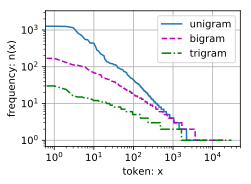

In [ ]:
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])

# **随机采样**

In [ ]:
def seq_data_iter_random(corpus, batch_size, num_steps):  
    """使用随机抽样生成一个小批量子序列"""
    # 从随机偏移量开始对序列进行分区，随机范围包括num_steps-1
    corpus = corpus[random.randint(0, num_steps - 1):]
    print(corpus[0])
    # 减去1，是因为我们需要考虑标签
    num_subseqs = (len(corpus) - 1) // num_steps
    print(num_subseqs)
    # 长度为num_steps的子序列的起始索引
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    print(initial_indices)
    # 在随机抽样的迭代过程中，
    # 来自两个相邻的、随机的、小批量中的子序列不一定在原始序列上相邻
    random.shuffle(initial_indices)
    print(initial_indices)

    def data(pos):
        # 返回从pos位置开始的长度为num_steps的序列
        return corpus[pos: pos + num_steps]

    num_batches = num_subseqs // batch_size
    print(num_batches)
    for i in range(0, batch_size * num_batches, batch_size):
        # 在这里，initial_indices包含子序列的随机起始索引
        initial_indices_per_batch = initial_indices[i: i + batch_size]
        print("test",initial_indices_per_batch)
        X = [data(j) for j in initial_indices_per_batch]
        print("x=",X)
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y)

# **Python 中的生成器??不懂**
https://www.geeksforgeeks.org/generators-in-python/

In [ ]:
my_seq = list(range(35))
print(my_seq)
for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
0
6
[0, 5, 10, 15, 20, 25]
[20, 15, 5, 10, 25, 0]
3
test [20, 15]
x= [[20, 21, 22, 23, 24], [15, 16, 17, 18, 19]]
X:  tensor([[20, 21, 22, 23, 24],
        [15, 16, 17, 18, 19]]) 
Y: tensor([[21, 22, 23, 24, 25],
        [16, 17, 18, 19, 20]])
test [5, 10]
x= [[5, 6, 7, 8, 9], [10, 11, 12, 13, 14]]
X:  tensor([[ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]) 
Y: tensor([[ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15]])
test [25, 0]
x= [[25, 26, 27, 28, 29], [0, 1, 2, 3, 4]]
X:  tensor([[25, 26, 27, 28, 29],
        [ 0,  1,  2,  3,  4]]) 
Y: tensor([[26, 27, 28, 29, 30],
        [ 1,  2,  3,  4,  5]])


# **顺序分区**

In [ ]:
def seq_data_iter_sequential(corpus, batch_size, num_steps):  
    """使用顺序分区生成一个小批量子序列"""
    # 从随机偏移量开始划分序列
    offset = random.randint(0, num_steps)
    print(offset)
    # 取整
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    print(num_tokens)
    Xs = torch.tensor(corpus[offset: offset + num_tokens])
    Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])
    print(Xs,Ys)
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)
    print(Xs,Ys)
    num_batches = Xs.shape[1] // num_steps
    print(num_batches)
    for i in range(0, num_steps * num_batches, num_steps):
        X = Xs[:, i: i + num_steps]
        print(X)
        Y = Ys[:, i: i + num_steps]
        yield X, Y

In [ ]:
for X, Y in seq_data_iter_sequential(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

3
30
tensor([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]) tensor([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
tensor([[ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]) tensor([[ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
        [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]])
3
tensor([[ 3,  4,  5,  6,  7],
        [18, 19, 20, 21, 22]])
X:  tensor([[ 3,  4,  5,  6,  7],
        [18, 19, 20, 21, 22]]) 
Y: tensor([[ 4,  5,  6,  7,  8],
        [19, 20, 21, 22, 23]])
tensor([[ 8,  9, 10, 11, 12],
        [23, 24, 25, 26, 27]])
X:  tensor([[ 8,  9, 10, 11, 12],
        [23, 24, 25, 26, 27]]) 
Y: tensor([[ 9, 10, 11, 12, 13],
        [24, 25, 26, 27, 28]])
tensor([[13, 14, 15, 16, 17],
        [28, 29, 30, 31, 

In [ ]:
# 上面两个采样modeld的融合
class SeqDataLoader:  
    """加载序列数据的迭代器"""
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            self.data_iter_fn = d2l.seq_data_iter_random
        else:
            self.data_iter_fn = d2l.seq_data_iter_sequential
        self.corpus, self.vocab = d2l.load_corpus_time_machine(max_tokens)
        self.batch_size, self.num_steps = batch_size, num_steps

    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

In [ ]:
def load_data_time_machine(batch_size, num_steps,  
                           use_random_iter=False, max_tokens=10000):
    """返回时光机器数据集的迭代器和词表"""
    data_iter = SeqDataLoader(
        batch_size, num_steps, use_random_iter, max_tokens)
    #  它同时返回数据迭代器和词表
    return data_iter, data_iter.vocab

# **RNN**

In [ ]:
import torch
from d2l import torch as d2l

X, W_xh = torch.normal(0, 1, (3, 1)), torch.normal(0, 1, (1, 4))
H, W_hh = torch.normal(0, 1, (3, 4)), torch.normal(0, 1, (4, 4))
torch.matmul(X, W_xh) + torch.matmul(H, W_hh)

tensor([[ 0.5370,  0.9885,  0.0996,  1.4134],
        [ 0.5392, -0.6474,  1.9075, -0.7265],
        [-0.4321, -1.0582,  0.6971, -1.2577]])

In [ ]:
torch.matmul(torch.cat((X, H), 1), torch.cat((W_xh, W_hh), 0)),torch.cat((X, H), 1).shape,torch.cat((W_xh, W_hh), 0).shape

(tensor([[ 0.5370,  0.9885,  0.0996,  1.4134],
         [ 0.5392, -0.6474,  1.9075, -0.7265],
         [-0.4321, -1.0582,  0.6971, -1.2577]]),
 torch.Size([3, 5]),
 torch.Size([5, 4]))

In [ ]:
%matplotlib inline
import math
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)


In [ ]:
F.one_hot(torch.tensor([0, 1]), len(vocab))

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]])

# **变换维度--考虑空间和时间的局部性**

**时间局部性（**temporal locality） ：被引用过一次的存储器位置在未来会被多次引用（通常在循环中）。 

**空间局部性**（spatial locality）：如果一个存储器的位置被引用，那么将来他附近的位置也会被引用。
 
 我们经常转换输入的维度，以便获得形状为
（时间步数，批量大小，词表大小）的输出。
这将使我们能够更方便地通过最外层的维度，
一步一步地更新小批量数据的隐状态

In [ ]:
X = torch.arange(10).reshape((2, 5))
F.one_hot(X.T, 28).shape,F.one_hot(X.T, 28)

(torch.Size([5, 2, 28]),
 tensor([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0]],
 
         [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0]],
 
         [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0]],
 
         [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0]],
 
         [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0],


# **num_inputs = num_outputs = vocab_size思考为啥?**

第一,输入是一个个char 把它变成one_hot从而可以进行文本特征的处理,所以num_inputs=28

第二,num_outputs=28,是因为输出是下一个词的预测,这个就是一个分类问题有28类,所以num_output=28

In [ ]:

def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01

    # 隐藏层参数
    W_xh = normal((num_inputs, num_hiddens))
    W_hh = normal((num_hiddens, num_hiddens))
    b_h = torch.zeros(num_hiddens, device=device)
    # 输出层参数
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    # 附加梯度
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

# **函数初始化时返回隐藏状态**

In [ ]:
def init_rnn_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device), )

In [ ]:
def rnn(inputs, state, params):
    # inputs的形状：(时间步数量，批量大小，词表大小)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    # X的形状：(批量大小，词表大小)
    for X in inputs:
        H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)
        Y = torch.mm(H, W_hq) + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H,)

In [ ]:
class RNNModelScratch: 
    """从零开始实现的循环神经网络模型"""
    def __init__(self, vocab_size, num_hiddens, device,
                 get_params, init_state, forward_fn):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, device)
        self.init_state, self.forward_fn = init_state, forward_fn

    def __call__(self, X, state):
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        return self.forward_fn(X, state, self.params)

    def begin_state(self, batch_size, device):
        return self.init_state(batch_size, self.num_hiddens, device)

In [ ]:
num_hiddens = 512
net = RNNModelScratch(len(vocab), num_hiddens, d2l.try_gpu(), get_params,
                      init_rnn_state, rnn)
print(X.shape)
state = net.begin_state(X.shape[0], d2l.try_gpu())
print(state[0].shape)
Y, new_state = net(X.to(d2l.try_gpu()), state)
Y.shape, len(new_state), new_state[0].shape

torch.Size([2, 5])
torch.Size([2, 512])


(torch.Size([10, 28]), 1, torch.Size([2, 512]))

In [ ]:
def predict_ch8(prefix, num_preds, net, vocab, device):  
    """在prefix后面生成新字符"""
    state = net.begin_state(batch_size=1, device=device)
    # print(state[0].shape) ->[1,512]
    # print(prefix[0])   ->t
    # print(vocab[prefix[0]]) ->3
    outputs = [vocab[prefix[0]]]
    # print(outputs)     ->[3]
    get_input = lambda: torch.tensor([outputs[-1]], device=device).reshape((1, 1))
    print(get_input)
    for y in prefix[1:]:  # 预热期
        _, state = net(get_input(), state)
        outputs.append(vocab[y])
    for _ in range(num_preds):  # 预测num_preds步
        y, state = net(get_input(), state)
        # print(y.shape)
        outputs.append(int(y.argmax(dim=1).reshape(1)))
        # print(outputs)
    return ''.join([vocab.idx_to_token[i] for i in outputs])

In [ ]:
predict_ch8('time traveller ', 10, net, vocab, d2l.try_gpu())

<function predict_ch8.<locals>.<lambda> at 0x7f5fd8dd2ef0>


'time traveller juvmuvmuvm'

# **`*梯度裁剪---??*`**

In [ ]:
def grad_clipping(net, theta):  
    """裁剪梯度"""
    if isinstance(net, nn.Module):
        params = [p for p in net.parameters() if p.requires_grad]
    else:
        params = net.params
    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

In [ ]:

def train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter):
    """训练网络一个迭代周期（定义见第8章）"""
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)  # 训练损失之和,词元数量
    for X, Y in train_iter:
        if state is None or use_random_iter:
            # 在第一次迭代或使用随机抽样时初始化state
            state = net.begin_state(batch_size=X.shape[0], device=device)
        else:
            if isinstance(net, nn.Module) and not isinstance(state, tuple):
                # state对于nn.GRU是个张量
                state.detach_()
            else:
                # state对于nn.LSTM或对于我们从零开始实现的模型是个张量
                for s in state:
                    s.detach_()
        y = Y.T.reshape(-1)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)
        l = loss(y_hat, y.long()).mean()
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            grad_clipping(net, 1)
            updater.step()
        else:
            l.backward()
            grad_clipping(net, 1)
            # 因为已经调用了mean函数
            updater(batch_size=1)
        metric.add(l * y.numel(), y.numel())
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()

In [ ]:

def train_ch8(net, train_iter, vocab, lr, num_epochs, device,
              use_random_iter=False):
    """训练模型（定义见第8章）"""
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity',
                            legend=['train'], xlim=[10, num_epochs])
    # 初始化
    if isinstance(net, nn.Module):
        updater = torch.optim.SGD(net.parameters(), lr)
    else:
        updater = lambda batch_size: d2l.sgd(net.params, lr, batch_size)
    predict = lambda prefix: predict_ch8(prefix, 50, net, vocab, device)
    # 训练和预测
    for epoch in range(num_epochs):
        ppl, speed = train_epoch_ch8(
            net, train_iter, loss, updater, device, use_random_iter)
        if (epoch + 1) % 10 == 0:
            print(predict('time traveller'))
            animator.add(epoch + 1, [ppl])
    print(f'困惑度 {ppl:.1f}, {speed:.1f} 词元/秒 {str(device)}')
    print(predict('time traveller'))
    print(predict('traveller'))

困惑度 1.1, 19351.9 词元/秒 cpu
<function predict_ch8.<locals>.<lambda> at 0x7f5f133e7f80>
time traveller for so it will be convenient to speak of himwas e
<function predict_ch8.<locals>.<lambda> at 0x7f5f15d48560>
traveller hime in all he th y main timives bethee here is h


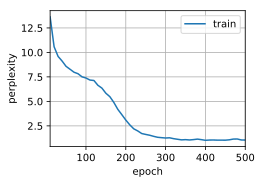

In [ ]:
num_epochs, lr = 500, 1
train_ch8(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu())

困惑度 1.4, 18100.2 词元/秒 cpu
<function predict_ch8.<locals>.<lambda> at 0x7f5f132715f0>
time traveller held in his hand was a glitteringmetallic framewo
<function predict_ch8.<locals>.<lambda> at 0x7f5f15d0ad40>
travellerit s against reason said filbycan a cube that does


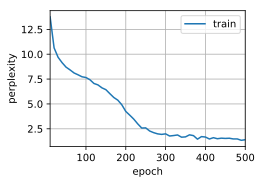

In [ ]:
net = RNNModelScratch(len(vocab), num_hiddens, d2l.try_gpu(), get_params,
                      init_rnn_state, rnn)
train_ch8(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu(),
          use_random_iter=True)

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [4]:
num_hiddens = 256
rnn_layer = nn.RNN(len(vocab), num_hiddens)

In [5]:
state = torch.zeros((1, batch_size, num_hiddens))
state.shape

torch.Size([1, 32, 256])

In [6]:
X = torch.rand(size=(num_steps, batch_size, len(vocab)))
Y, state_new = rnn_layer(X, state)
Y.shape, state_new.shape

(torch.Size([35, 32, 256]), torch.Size([1, 32, 256]))

In [3]:

class RNNModel(nn.Module):
    """循环神经网络模型"""
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size
        # 如果RNN是双向的（之后将介绍），num_directions应该是2，否则应该是1
        if not self.rnn.bidirectional:
            self.num_directions = 1
            self.linear = nn.Linear(self.num_hiddens, self.vocab_size)
        else:
            self.num_directions = 2
            self.linear = nn.Linear(self.num_hiddens * 2, self.vocab_size)

    def forward(self, inputs, state):
        X = F.one_hot(inputs.T.long(), self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.rnn(X, state)
        # 全连接层首先将Y的形状改为(时间步数*批量大小,隐藏单元数)
        # 它的输出形状是(时间步数*批量大小,词表大小)。
        output = self.linear(Y.reshape((-1, Y.shape[-1])))
        return output, state
# 李老师后面讲
    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            # nn.GRU以张量作为隐状态
            return  torch.zeros((self.num_directions * self.rnn.num_layers,
                                 batch_size, self.num_hiddens),
                                device=device)
        else:
            # nn.LSTM以元组作为隐状态
            return (torch.zeros((
                self.num_directions * self.rnn.num_layers,
                batch_size, self.num_hiddens), device=device),
                    torch.zeros((
                        self.num_directions * self.rnn.num_layers,
                        batch_size, self.num_hiddens), device=device))

In [7]:
device = d2l.try_gpu()
net = RNNModel(rnn_layer, vocab_size=len(vocab))
net = net.to(device)
d2l.predict_ch8('time traveller', 10, net, vocab, device)

'time travellertkkkzuykzu'

perplexity 1.3, 63040.7 tokens/sec on cpu
time traveller cur le is his prourecu trace the ceracely taccula
traveller wat ansthuuriod a istert y ane hive i le tome tim


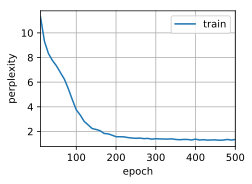

In [8]:
num_epochs, lr = 500, 1
d2l.train_ch8(net, train_iter, vocab, lr, num_epochs, device)